In [3]:
import os
#import chart_function_list
os.environ

environ({'HOME': '/Users/alexanderpudlin', '__CF_USER_TEXT_ENCODING': '0x1F5:0x0:0x0', 'USER': 'alexanderpudlin', 'PAGER': 'cat', 'XPC_SERVICE_NAME': '0', 'TERM_PROGRAM': 'Apple_Terminal', 'GIT_PAGER': 'cat', 'SHELL': '/bin/bash', 'JPY_PARENT_PID': '865', 'TERM_PROGRAM_VERSION': '388.1', 'TERM': 'xterm-color', 'PWD': '/Users/alexanderpudlin', 'PYTHONPATH': '/Users/alexanderpudlin/Documents/GitHub/iTeamLAPDPriorityArea/functions:/Users/alexanderpudlin/Desktop/New_Scripts/mymodules:', 'SHLVL': '2', 'LANG': 'en_US.UTF-8', 'CLICOLOR': '1', 'XPC_FLAGS': '0x0', 'TERM_SESSION_ID': '24332E68-CF55-463B-9D3D-060BA1308C3A', 'TMPDIR': '/var/folders/dy/rschhv411tq80_7x45k7g7_80000gn/T/', 'Apple_PubSub_Socket_Render': '/private/tmp/com.apple.launchd.Hf4Y0Ekfe2/Render', '_': '/Users/alexanderpudlin/anaconda3/bin/jupyter-notebook', 'LOGNAME': 'alexanderpudlin', 'PATH': '/Users/alexanderpudlin/anaconda3/bin:/Users/alexanderpudlin/anaconda2/bin:/Users/alexanderpudlin/anaconda3/bin:/usr/local/bin:/usr/bi

In [2]:
_,datafolder,outputs=charts_function_list.folder_setup()

In [205]:
#Since the get_title_by_id function takes a while to complete, save as a new .csv for faster access later
os.chdir(datafolder)
sequels_with_ratings = pd.read_csv('sequels_with_rating.csv',index_col=[0,1])

In [190]:
class chart_maker(object):
    def __init__(self,title,title_size):
        self.title = title
        self.title_size = title_size
    
    def initial_fig_axis(self,figsize=(11,8)):
        fig = plt.figure(figsize=figsize)
        fig.suptitle(self.title,fontsize=self.title_size)
        return fig
    
    def axes_set_up(self,rows=1,columns=1,plot_num=1):
        ax = fig.add_subplot(rows,columns,plot_num)
        return ax
    
    def y_axis_setup(self,min=ax.get_yticks().min(),max=ax.get_yticks().max()):
        ax.set_ylim(min,max)
        return ax
        
    def x_axis_setup(self,min=ax.get_xticks().min(),max=ax.get_xticks().max(),interval=1):
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(interval))
        ax.set_xlim(min,max)
        return ax
        
        
        
    

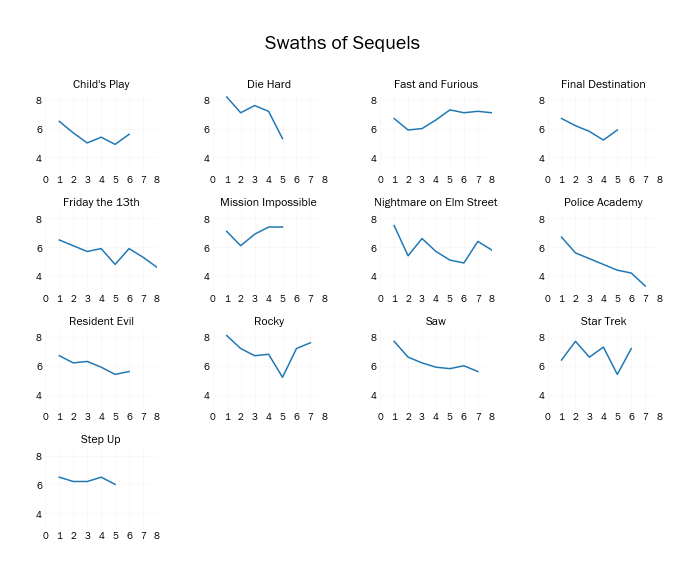

In [206]:
sequel_titles = np.array(sequels_with_ratings.index.get_level_values(0).unique())
my_new_chart = chart_maker(title='Swaths of Sequels',title_size=20)
fig = my_new_chart.initial_fig_axis()

for item in range(len(sequel_titles)):
    ax = my_new_chart.axes_set_up(rows=4,columns=4,plot_num=item+1)
    plt.title(sequel_titles[item])
    plt.plot(sequels_with_ratings.loc[sequel_titles[item]].index.values+1,
             sequels_with_ratings.loc[sequel_titles[item]]['rating'])
    my_new_chart.y_axis_setup(3,8.5)
    my_new_chart.x_axis_setup(interval=1)
    
plt.show()

### Pre-Work for Reference

In order to obtain the titles, I used the IMDBpie title search function and converted to a DataFrame. This produces many false positives. Initially, the intent was to feed the entire list into a separate IMDBpie function that pulls ratings and votes, and then only include films that have more votes than a particular threshold. The intensity of this exercise was going to vary (e.g. quick and dirty trial and error vs. building a classifier). However, I never even made it that far! In practice, the pulling of ratings by ID# took quite a while for each ID, let alone hundreds. Thus, I instead manually selected the films I wanted and created a new dataset, which is the one featured in this code. 

Following this, I pulled ratings using the IMDBpie Get Title by ID function using the cleaned list. For ease of workflow, I exported the resulting ratings as a .csv.

Also note, the original code did not pull particular titles, requiring some additional research on IMDb to fill in the gaps.

In [ ]:
from imdbpie import Imdb

imdb = Imdb()
imdb = Imdb(anonymize=True)

def title_search(title):
    return pd.DataFrame(imdb.search_for_title(title),index=[x for x in range(len(pd.DataFrame(imdb.search_for_title(title))))])

titles_to_search=['Fast and Furious','Police Academy',
                  'Nightmare on Elm Street',
                  'Saw',
                  'Friday the 13th',
                  'Star Trek','Final Destination',
                  'Rocky','Step Up',
                  'Mission Impossible','Die Hard','Resident Evil','Child\'s Play','Halloween','Home Alone','House Party',
                  'Paranormal Activity','Predator','Terminator','Pirates of the Caribbean','Underworld',
                  'Death Wish','Godzilla','Scary Movie','Children of the Corn','Michael Myers']
combined_titles = pd.concat([title_search(title) for title in titles_to_search],keys=titles_to_search)

#clean data
combined_titles.dropna(subset=['year'],inplace=True)
combined_titles['year']=combined_titles['year'].astype('int')
combined_titles = combined_titles[(combined_titles['year']<=2017)&(combined_titles['year']>1960)]

### Pull ratings and votes using the imdb id

In [ ]:
os.chdir(datafolder)
sequels = pd.read_csv('sequels_list_cleaned.csv')
sequels = sequels.sort_values(['Category','year']).set_index('Category')
sequels = charts_function_list.multi_numeric_index(sequels)
imdb = Imdb()
imdb = Imdb(anonymize=True)

title_list = sequels['imdb_id'].values
ratings_and_votes = pd.DataFrame({'rating':[imdb.get_title_by_id(title_).rating for title_ in title_list],
                        'votes':[imdb.get_title_by_id(title_).votes for title_ in title_list],
                                 'imdb_id':[title_ for title_ in title_list]})

sequels = sequels.reset_index()
sequels_with_ratings = pd.merge(sequels,ratings_and_votes,on='imdb_id',how='left')
sequels_with_ratings= sequels_with_ratings.set_index(['Category','level_1'],drop=True)

sequels_with_ratings.to_csv('sequels_with_rating.csv')